In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from gym.envs.registration import register

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={
        'map_name':'4x4',
        'is_slippery':True
    }
)

In [27]:
env = gym.make('FrozenLake-v3')
Q = np.zeros([env.observation_space.n, env.action_space.n])

dis = 0.99
num_episodes = 2000
alpha = 0.2
rList = []

In [28]:
for i in range(num_episodes):
    
    state = env.reset()
    rAll = 0
    done = False
    e = 1./(1+i//100)
    
    while not done:
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
            
        new_state, reward, done, _ = env.step(action)
        
        Q[state, action] = Q[state, action] + alpha*(reward + dis*np.max(Q[new_state, :]) - Q[state, action])
        
        state = new_state
        rAll += reward
        
    rList.append(rAll)

Success rate: 0.3115
[[0.4683055  0.46676922 0.46804826 0.46698121]
 [0.30911934 0.27081599 0.12579732 0.41019883]
 [0.33866415 0.18077329 0.22327248 0.20899858]
 [0.12819254 0.         0.0692236  0.08627987]
 [0.49314501 0.43108063 0.27825683 0.44971255]
 [0.         0.         0.         0.        ]
 [0.11046937 0.01721649 0.2435999  0.03317079]
 [0.         0.         0.         0.        ]
 [0.50531922 0.36650851 0.43768042 0.53992378]
 [0.51508997 0.61325142 0.42139705 0.36210979]
 [0.65573045 0.35835525 0.14916304 0.28869714]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.56691677 0.4874697  0.70378582 0.54733388]
 [0.67722566 0.8646811  0.6932283  0.70640103]
 [0.         0.         0.         0.        ]]


<BarContainer object of 2000 artists>

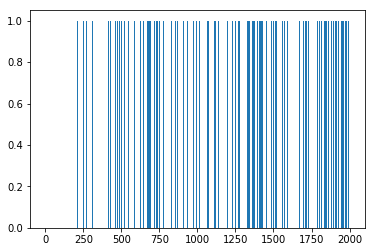

In [29]:
print(f"Success rate: {sum(rList)/num_episodes}")
print(Q)
plt.bar(list(range(1, num_episodes+1)), rList)